In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/police-shootings/fatal-police-shootings-agencies.csv
/kaggle/input/police-shootings/fatal-police-shootings-data.csv


In [2]:
df = pd.read_csv('/kaggle/input/police-shootings/fatal-police-shootings-data.csv')

In [3]:
df

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-1.046923e+02,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9473,2023-08-22,shoot,not,gun,Canton,Madison,MS,32.506799,-9.007175e+15,intersection,Ladarrius Johnson,24.0,male,B,public_record,False,False,2211
8723,9474,2023-08-23,threat,foot,gun,Aurora,Adams,CO,39.740200,-1.048658e+02,intersection,NaN,NaN,male,NaN,NaN,False,True,21
8724,9476,2023-08-25,NaN,NaN,undetermined,Charlotte,Mecklenburg,NC,35.339644,-8.085310e+01,block,NaN,NaN,male,NaN,NaN,False,False,354
8725,9478,2023-08-27,threat,NaN,knife,Jersey City,Hudson,NJ,40.712567,-7.406971e+01,intersection,Andrew Jerome Washington,52.0,male,NaN,NaN,True,True,1321


In [4]:
def print_percent_and_count_null(data):
    data_null = data.isna().sum()
    percent_null = data.isna().sum() / len(data)
    percent_null = percent_null.apply(lambda x: f"{x:.1%}")
    result = pd.concat([data_null, percent_null], axis=1)
    result.columns = ['Null Count', 'Null Percentage']
    return result
print_percent_and_count_null(df)

,Null Count,Null Percentage
id,0,0.0%
date,0,0.0%
threat_type,40,0.5%
flee_status,1177,13.5%
armed_with,210,2.4%
city,54,0.6%
county,4856,55.6%
state,0,0.0%
latitude,980,11.2%
longitude,980,11.2%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8727 non-null   int64  
 1   date                        8727 non-null   object 
 2   threat_type                 8687 non-null   object 
 3   flee_status                 7550 non-null   object 
 4   armed_with                  8517 non-null   object 
 5   city                        8673 non-null   object 
 6   county                      3871 non-null   object 
 7   state                       8727 non-null   object 
 8   latitude                    7747 non-null   float64
 9   longitude                   7747 non-null   float64
 10  location_precision          7747 non-null   object 
 11  name                        8153 non-null   object 
 12  age                         8125 non-null   float64
 13  gender                      8680 

In [6]:
count_armed_with = df['armed_with'].value_counts().reset_index()
count_armed_with

,armed_with,count
0,gun,5059
1,knife,1467
2,unarmed,514
3,undetermined,340
4,vehicle,306
5,replica,288
6,blunt_object,213
7,unknown,137
8,other,88
9,gun;vehicle,38


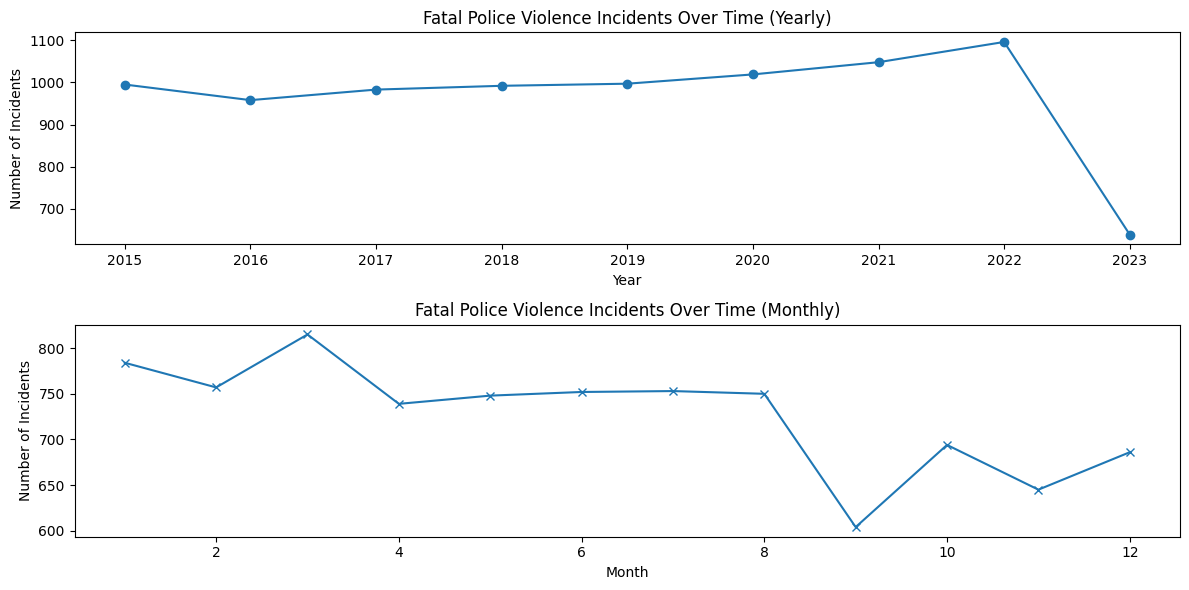

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

incident_counts_year = df['year'].value_counts().sort_index()
incident_counts_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(incident_counts_year.index, incident_counts_year.values, marker='o', linestyle='-')
plt.title('Fatal Police Violence Incidents Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.subplot(2, 1, 2)

plt.plot(incident_counts_month.index, incident_counts_month.values, marker='x', linestyle='-')
plt.title('Fatal Police Violence Incidents Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()

In [8]:
import plotly.express as px

**Show with pie Gun vs Knife percents**

In [9]:
count_armed_with

,armed_with,count
0,gun,5059
1,knife,1467
2,unarmed,514
3,undetermined,340
4,vehicle,306
5,replica,288
6,blunt_object,213
7,unknown,137
8,other,88
9,gun;vehicle,38


In [10]:
fig = px.pie(count_armed_with, names='armed_with', values='count', hole=.3)
fig.show()

In [11]:
df

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids,year,month
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,...,Tim Elliot,53.0,male,A,not_available,True,False,73,2015,1
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,...,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70,2015,1
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,...,John Paul Quintero,23.0,male,H,not_available,False,False,238,2015,1
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,...,Matthew Hoffman,32.0,male,W,not_available,True,False,196,2015,1
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-1.046923e+02,...,Michael Rodriguez,39.0,male,H,not_available,False,False,473,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9473,2023-08-22,shoot,not,gun,Canton,Madison,MS,32.506799,-9.007175e+15,...,Ladarrius Johnson,24.0,male,B,public_record,False,False,2211,2023,8
8723,9474,2023-08-23,threat,foot,gun,Aurora,Adams,CO,39.740200,-1.048658e+02,...,NaN,NaN,male,NaN,NaN,False,True,21,2023,8
8724,9476,2023-08-25,NaN,NaN,undetermined,Charlotte,Mecklenburg,NC,35.339644,-8.085310e+01,...,NaN,NaN,male,NaN,NaN,False,False,354,2023,8
8725,9478,2023-08-27,threat,NaN,knife,Jersey City,Hudson,NJ,40.712567,-7.406971e+01,...,Andrew Jerome Washington,52.0,male,NaN,NaN,True,True,1321,2023,8


In [12]:
mental_illness_true = df[df['was_mental_illness_related'] == True]
mental_illness_false = df[df['was_mental_illness_related'] == False]

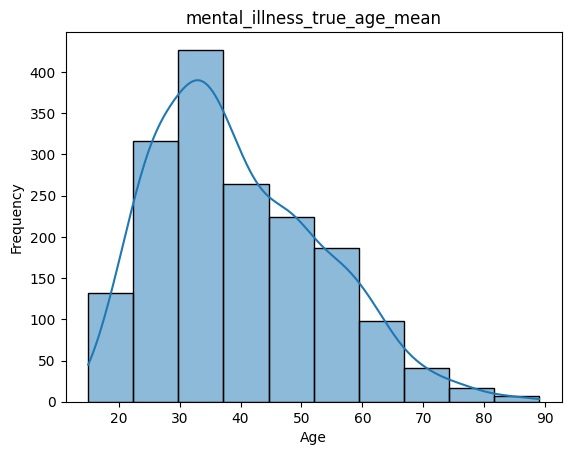

In [13]:
sns.histplot(mental_illness_true['age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('mental_illness_true_age_mean')
plt.show()

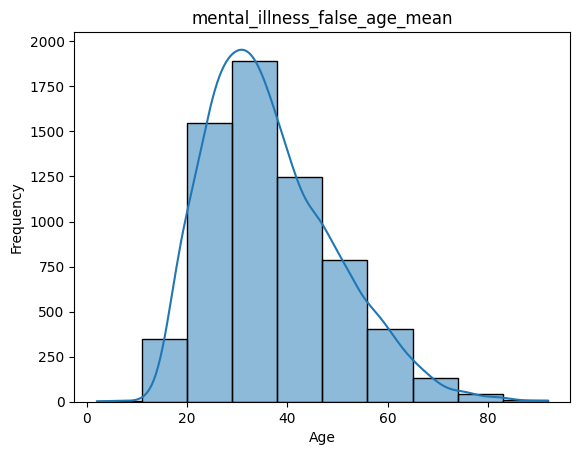

In [14]:
sns.histplot(mental_illness_false['age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('mental_illness_false_age_mean')
plt.show()


In [15]:
df

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids,year,month
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,...,Tim Elliot,53.0,male,A,not_available,True,False,73,2015,1
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,...,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70,2015,1
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,...,John Paul Quintero,23.0,male,H,not_available,False,False,238,2015,1
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,...,Matthew Hoffman,32.0,male,W,not_available,True,False,196,2015,1
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-1.046923e+02,...,Michael Rodriguez,39.0,male,H,not_available,False,False,473,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9473,2023-08-22,shoot,not,gun,Canton,Madison,MS,32.506799,-9.007175e+15,...,Ladarrius Johnson,24.0,male,B,public_record,False,False,2211,2023,8
8723,9474,2023-08-23,threat,foot,gun,Aurora,Adams,CO,39.740200,-1.048658e+02,...,NaN,NaN,male,NaN,NaN,False,True,21,2023,8
8724,9476,2023-08-25,NaN,NaN,undetermined,Charlotte,Mecklenburg,NC,35.339644,-8.085310e+01,...,NaN,NaN,male,NaN,NaN,False,False,354,2023,8
8725,9478,2023-08-27,threat,NaN,knife,Jersey City,Hudson,NJ,40.712567,-7.406971e+01,...,Andrew Jerome Washington,52.0,male,NaN,NaN,True,True,1321,2023,8


In [16]:
count_gender = df['gender'].value_counts().reset_index()
count_gender

,gender,count
0,male,8298
1,female,381
2,non-binary,1


**Case percent per gender**

In [17]:
fig = px.pie(count_gender, names='gender', values='count', hole=.3, color_discrete_map={'male':'royalblue',
                                 'female':'green',
                                 'non-binary':'orange'})
fig.show()

In [18]:
count_state = df['state'].value_counts().reset_index()
count_state

,state,count
0,CA,1232
1,TX,801
2,FL,558
3,AZ,396
4,GA,331
5,CO,316
6,NC,252
7,OH,249
8,TN,246
9,OK,239


In [19]:
print_percent_and_count_null(df)

,Null Count,Null Percentage
id,0,0.0%
date,0,0.0%
threat_type,40,0.5%
flee_status,1177,13.5%
armed_with,210,2.4%
city,54,0.6%
county,4856,55.6%
state,0,0.0%
latitude,980,11.2%
longitude,980,11.2%


In [20]:
from plotly.express import scatter_geo
scatter_geo(data_frame=df[df['age'].notnull()], lat='latitude', lon='longitude', scope='usa', hover_name='name', color='age')

In [21]:
scatter_geo(data_frame=df[df['armed_with'].notnull()], lat='latitude', lon='longitude', scope='usa', hover_name='name', color='armed_with')